In [108]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [109]:
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [110]:
def calc_mse(y, y_pred):
  return np.mean((y - y_pred)**2)

### Задание 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [111]:
def default_regression(data, target, alpha=1e-3, 
                       min_dist=1e-7, max_iter=1e+5):
    n = len(target)
    W = np.array([1, 0.5])
    delta_w = np.inf
    iter_ = 0
    iter_err = []
    while (delta_w > min_dist) and (iter_ < max_iter):
        iter_ += 1
        y_pred = np.dot(W, data.T)
        err = calc_mse(target, y_pred)
        W_new = W - alpha * (1/n * 2 * (data.T @ (y_pred - target)))    
        delta_w = np.abs(np.linalg.norm(W_new - W, ord=2)) #np.abs(err_new-err) 
        W = W_new
        iter_err.append(err)
        if iter_ % 10000 == 0:
            print(iter_, W, delta_mean)
    return W, np.array(iter_err)

In [112]:
def stochastic_regression(data, target, alpha=1e-3, 
                       min_dist=1e-7, max_iter=1e+5):
    n = data.shape[1]
    W = np.array([1, 0.5])
    delta_w = np.inf
    delta_err = np.inf
    
    iter_ = 0
    iter_err = []
    while (delta_w > min_dist) and (iter_ < max_iter):
        train_id = np.random.randint(data.shape[0])
        y_pred = np.dot(data[train_id], W)
        err = calc_mse(target, data.dot(W))
        W_new = W - alpha * (1/n * 2 * np.dot(data[train_id].T, (y_pred - target[train_id])))    
        delta_w = np.abs(np.linalg.norm(W_new - W, ord=2)) #np.abs(err_new-err)
        if iter_ > 0:
            delta_err = np.abs(err - iter_err[iter_ - 1])
        W = W_new
        iter_ += 1
        iter_err.append(err)
        if iter_ % 10000 == 0:
            print(iter_, W, delta_w, delta_err)
    return W, np.array(iter_err)


In [113]:
W, iter_err = default_regression(data, target)

In [114]:
W_st, iter_err_st = stochastic_regression(data, target)

10000 [62.25636211 68.4855564 ] 0.0027935289610198036 0.00022289003299391652
20000 [62.40701811 68.26366465] 0.006071345579858701 7.300520248065823e-05
30000 [62.64355148 68.18962038] 0.007934513479694039 0.002714614684400374


(0.0, 5000.0)

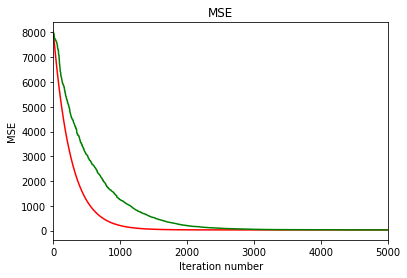

In [115]:
plt.plot(iter_err, 'r')
plt.plot(iter_err_st, 'g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 5000)

При стохастической регрессии сходимость наступает медленнее

### Задание 2. Модифицировать решение первого задания путем добавления  𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [116]:
def default_regression_l2(data, target, alpha=1e-3, 
                       min_dist=1e-7, max_iter=1e+5, lambda_=1e-8):
    n = len(target)
    W = np.array([1, 0.5])
    delta_w = np.inf
    iter_ = 0
    iter_err = []
    while (delta_w > min_dist) and (iter_ < max_iter):
        iter_ += 1
        y_pred = np.dot(W, data.T)
        err = calc_mse(target, y_pred)
        W_new = W - alpha * (1/n * 2 * (data.T @ (y_pred - target)) + lambda_ * W)    
        delta_w = np.abs(np.linalg.norm(W_new - W, ord=2)) #np.abs(err_new-err) 
        W = W_new
        iter_err.append(err)
        if iter_ % 1000 == 0:
            print(iter_, W, delta_w)
    return W, np.array(iter_err)

In [117]:
def stochastic_regression_l2(data, target, alpha=1e-3, 
                       min_dist=1e-7, max_iter=1e+5, lambda_=1e-7):
    n = data.shape[1]
    W = np.array([1, 0.5])
    delta_w = np.inf
    delta_err = np.inf
    
    iter_ = 0
    iter_err = []
    while (delta_w > min_dist) and (iter_ < max_iter):
        train_id = np.random.randint(data.shape[0])
        y_pred = np.dot(data[train_id], W)
        err = calc_mse(target, data.dot(W))
        W_new = W - alpha * (1/n * 2 * np.dot(data[train_id].T, (y_pred - target[train_id])) + lambda_*W)    
        delta_w = np.abs(np.linalg.norm(W_new - W, ord=2)) #np.abs(err_new-err)
        if iter_ > 0:
            delta_err = np.abs(err - iter_err[iter_ - 1])
        W = W_new
        iter_ += 1
        iter_err.append(err)
        if iter_ % 10000 == 0:
            print(iter_, W, delta_w, delta_err)
    return W, np.array(iter_err)


In [118]:
W_l2, iter_err_l2 = default_regression_l2(data, target)

1000 [53.17395528 58.35108406] 0.025848579444664566
2000 [60.9629439  66.82416729] 0.0038192294946129165
3000 [62.12459171 68.06621354] 0.0005643874930706298
4000 [62.29768592 68.24842298] 8.341231939566976e-05
5000 [62.3234579  68.27517232] 1.2328915838573845e-05
6000 [62.32729239 68.27910183] 1.8224424293086126e-06
7000 [62.32786254 68.27967943] 2.694081587635139e-07


In [119]:
W_st_l2, iter_err_st_l2 = stochastic_regression_l2(data, target)

10000 [62.27537439 68.16533135] 0.005661521739916255 0.001819641696162222
20000 [62.42013971 68.45777526] 4.240364726106462e-05 0.0007998353670437552


(0.0, 3000.0)

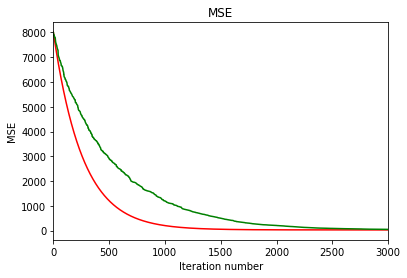

In [120]:
plt.plot(iter_err_l2, 'r')
plt.plot(iter_err_st_l2, 'g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 3000)

In [121]:
len(iter_err), len(iter_err_l2)

(7519, 7519)

In [122]:
len(iter_err_st), len(iter_err_st_l2)

(39570, 26469)

In [123]:
W_st_l2, coef

(array([62.22478278, 68.29081273]), array([62.6735955, 68.0472182]))

Введение L2 регуляризации значительно увеличивает скорость сходимости для стохастической регрессии.

### Задание 3. Напишите функцию наподобие eval_model_reg2, но для применения L1-регуляризации.

In [190]:
def default_regression_l1(data, target, alpha=1e-3, 
                       min_dist=1e-7, max_iter=1e+5, lambda_=1e-2):
    n = len(target)
    W = np.array([1, 0.5])
    delta_w = np.inf
    iter_ = 0
    iter_err = []
    while (delta_w > min_dist) and (iter_ < max_iter):
        iter_ += 1
        y_pred = np.dot(W, data.T)
        err = calc_mse(target, y_pred)
        W_new = W - alpha * (1/n * 2 * (data.T @ (y_pred - target)) + lambda_)    
        delta_w = np.abs(np.linalg.norm(W_new - W, ord=2))
        W = W_new
        iter_err.append(err)
        if iter_ % 1000 == 0:
            print(iter_, W, delta_w)
    return W, np.array(iter_err)

In [191]:
W_l1, iter_err_l1 = default_regression_l1(data, target)

1000 [53.16948615 58.34662955] 0.02584648753098239
2000 [60.95781121 66.81905723] 0.00381892018281506
3000 [62.11936055 68.06100697] 0.00056434175845722
4000 [62.29244014 68.24320219] 8.340555716068551e-05
5000 [62.31820996 68.26994944] 1.2327915997318715e-05
6000 [62.32204412 68.27387864] 1.8222945964783326e-06
7000 [62.32261423 68.27445619] 2.693862947066714e-07


In [192]:
len(iter_err_l1)

7519

In [193]:
W_l1

array([62.32267675, 68.27451895])

In [194]:
coef

array([62.6735955, 68.0472182])

### Задание 4. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет при стандартизации значения признака от 0 до 1 при нормализации от -1 до 1.